In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [146]:
sns.set()
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

colors = sns.color_palette('hls', 10, desat = 0.8)
#colors = colors[::-1]
colors.pop(2)

sns.set_palette(colors)

#sns.palplot(colors)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 150

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [147]:
def slope_fork(x_j):
    if x_j >= 0.5:
        return 1
    else:
        return -0.59
    
def update_x(x_j, eps, N_tot):
    x_up = x_j + (slope_fork(x_j) * eps) / N_tot
    if 0 < x_up < 1:
        return x_up
    elif x_up >= 1: 
        return 1
    else: 
        return 0

def clap(x, w, t, t_clap, sig):
    x = 0
    w = np.random.normal(0, sig) + 1 / (t - t_clap)
    t_clap = t
    return x, w, t_clap


In [148]:

def sim2(x_init, w_init, t_clap_init, dt, tmax, sig=0.1, eps=0.1):

    t = 0
    x = x_init
    w = w_init
    t_clap = t_clap_init
    x0_save = []
    
    N = len(w)
    w_save = [[] for i in range(N)]
    t_save = [[] for i in range(N)]
    avg_save = []
    n_clap = 0
    
    for entry in range(len(w_save)):
        w_save[entry].append(w[entry])
        t_save[entry].append(t)

    print(w_save)

    while t < tmax:
        
        x += w * dt
        index = np.where(x >= 1)[0]

        if len(index) >= 1: 
            for i in index:
                x[i] = 0
                w[i] = np.random.normal(0, sig) + 1 / (t - t_clap[i])
                t_clap[i] = t
                
                w_save[i].append(w[i])
                t_save[i].append(t_clap[i])
                n_clap += 1

                # Update all other x
                for j in range(len(x)):
                    if j != i:
                        x[j] = update_x(x[j], eps, N)
                    else:
                        continue             
        t += dt
        x0_save.append(x[0])

        if int(t % (dt*10)) == 0: 
            avg_save.append(np.mean(w))
            
    return w_save, t_save, x0_save, avg_save, n_clap

In [149]:
N = 10
w_init = np.random.normal(1.5, 0.1, N)
x_list = np.zeros(N)
t_clap = np.zeros(N)

dt = 0.0025
t_max = 500

w_save, t_save, x0_list, avg_save, n_clap = sim2(x_list, w_init, t_clap, dt, t_max, sig=0.1, eps=0.1)
print(n_clap)


[[np.float64(1.4509189606038115)], [np.float64(1.5110260046764448)], [np.float64(1.5017593853576805)], [np.float64(1.5232056432578596)], [np.float64(1.3105390384441329)], [np.float64(1.5930555564298272)], [np.float64(1.5309675361130042)], [np.float64(1.6032581885061072)], [np.float64(1.5067377709132779)], [np.float64(1.5458796783339745)]]
23100


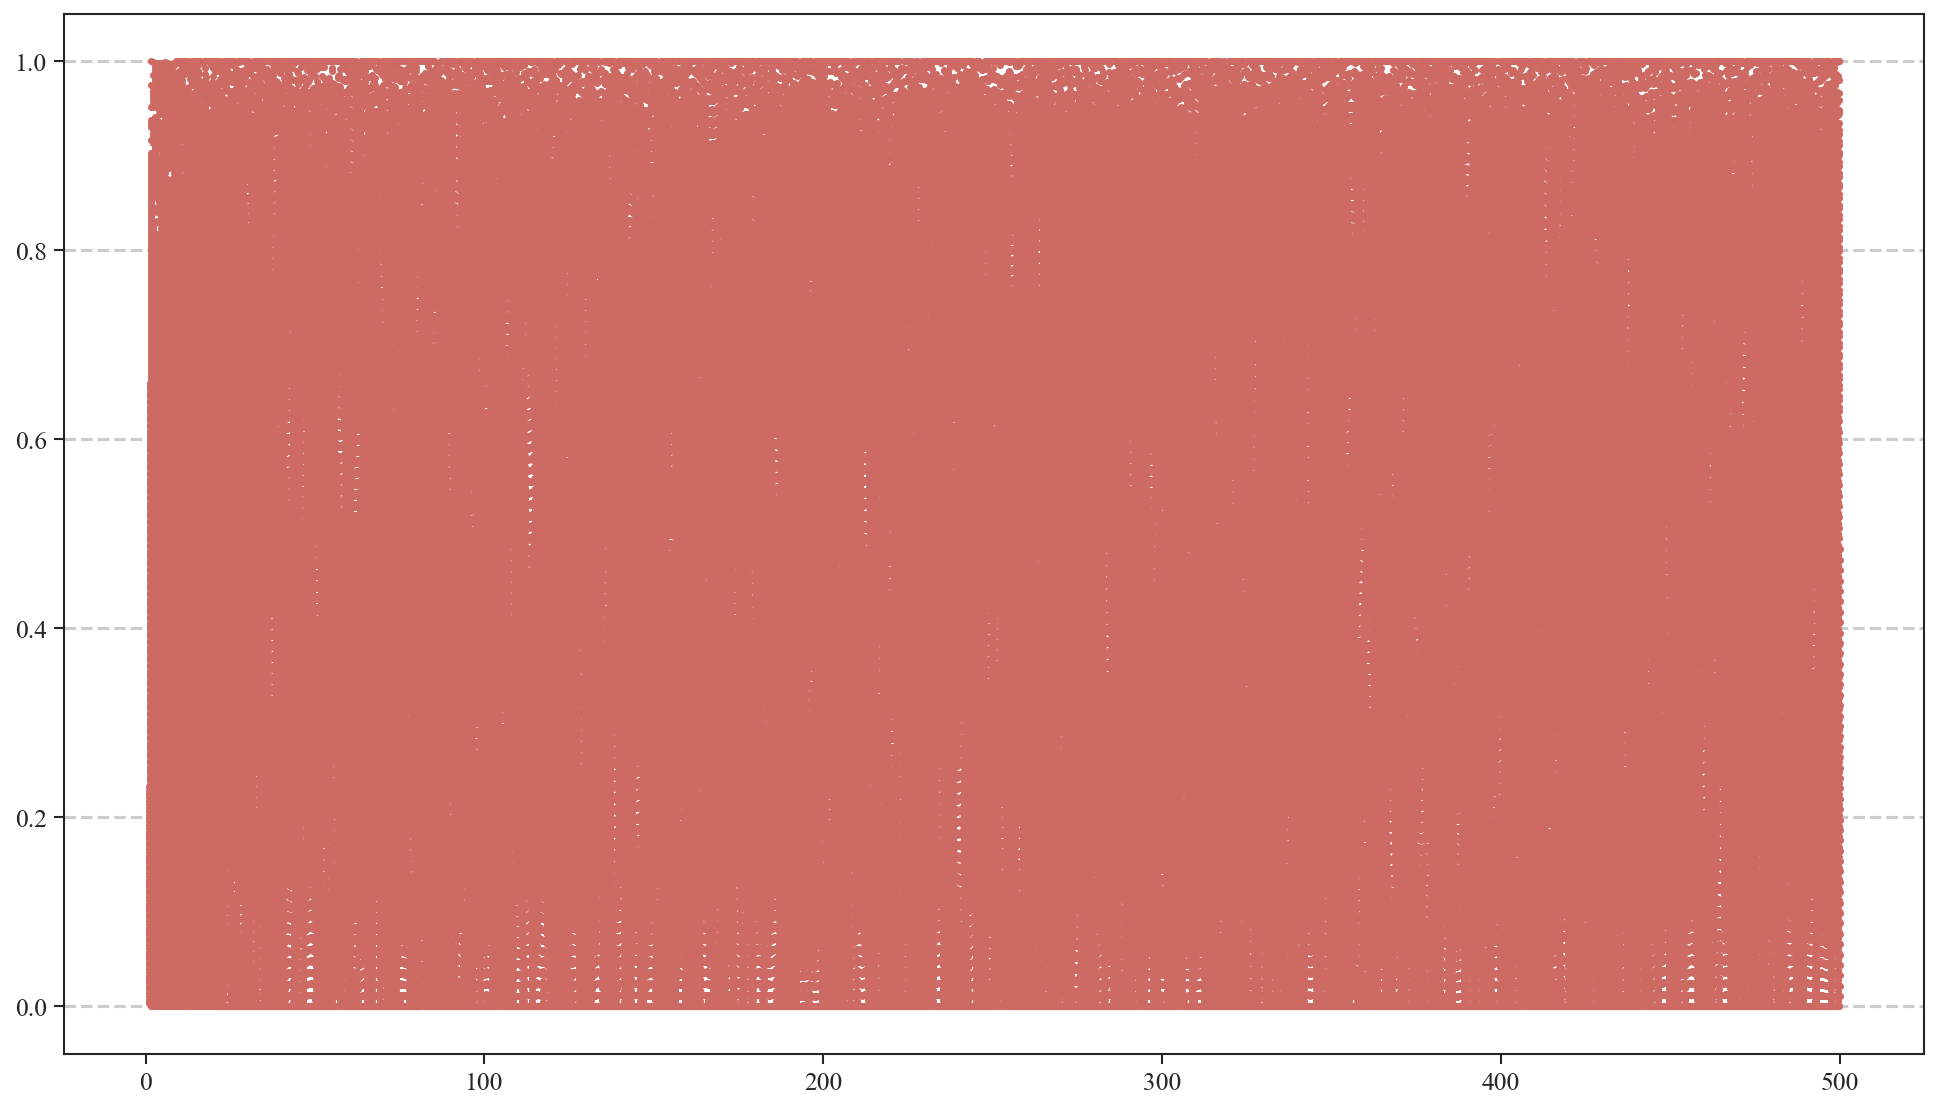

In [150]:
time = np.linspace(1, t_max, len(x0_list))
plt.plot(time, x0_list, marker='.', linestyle='')
#plt.xlim(1, 1.5)
#plt.ylim(-0.2, 1)

Text(0, 0.5, 'Frequency')

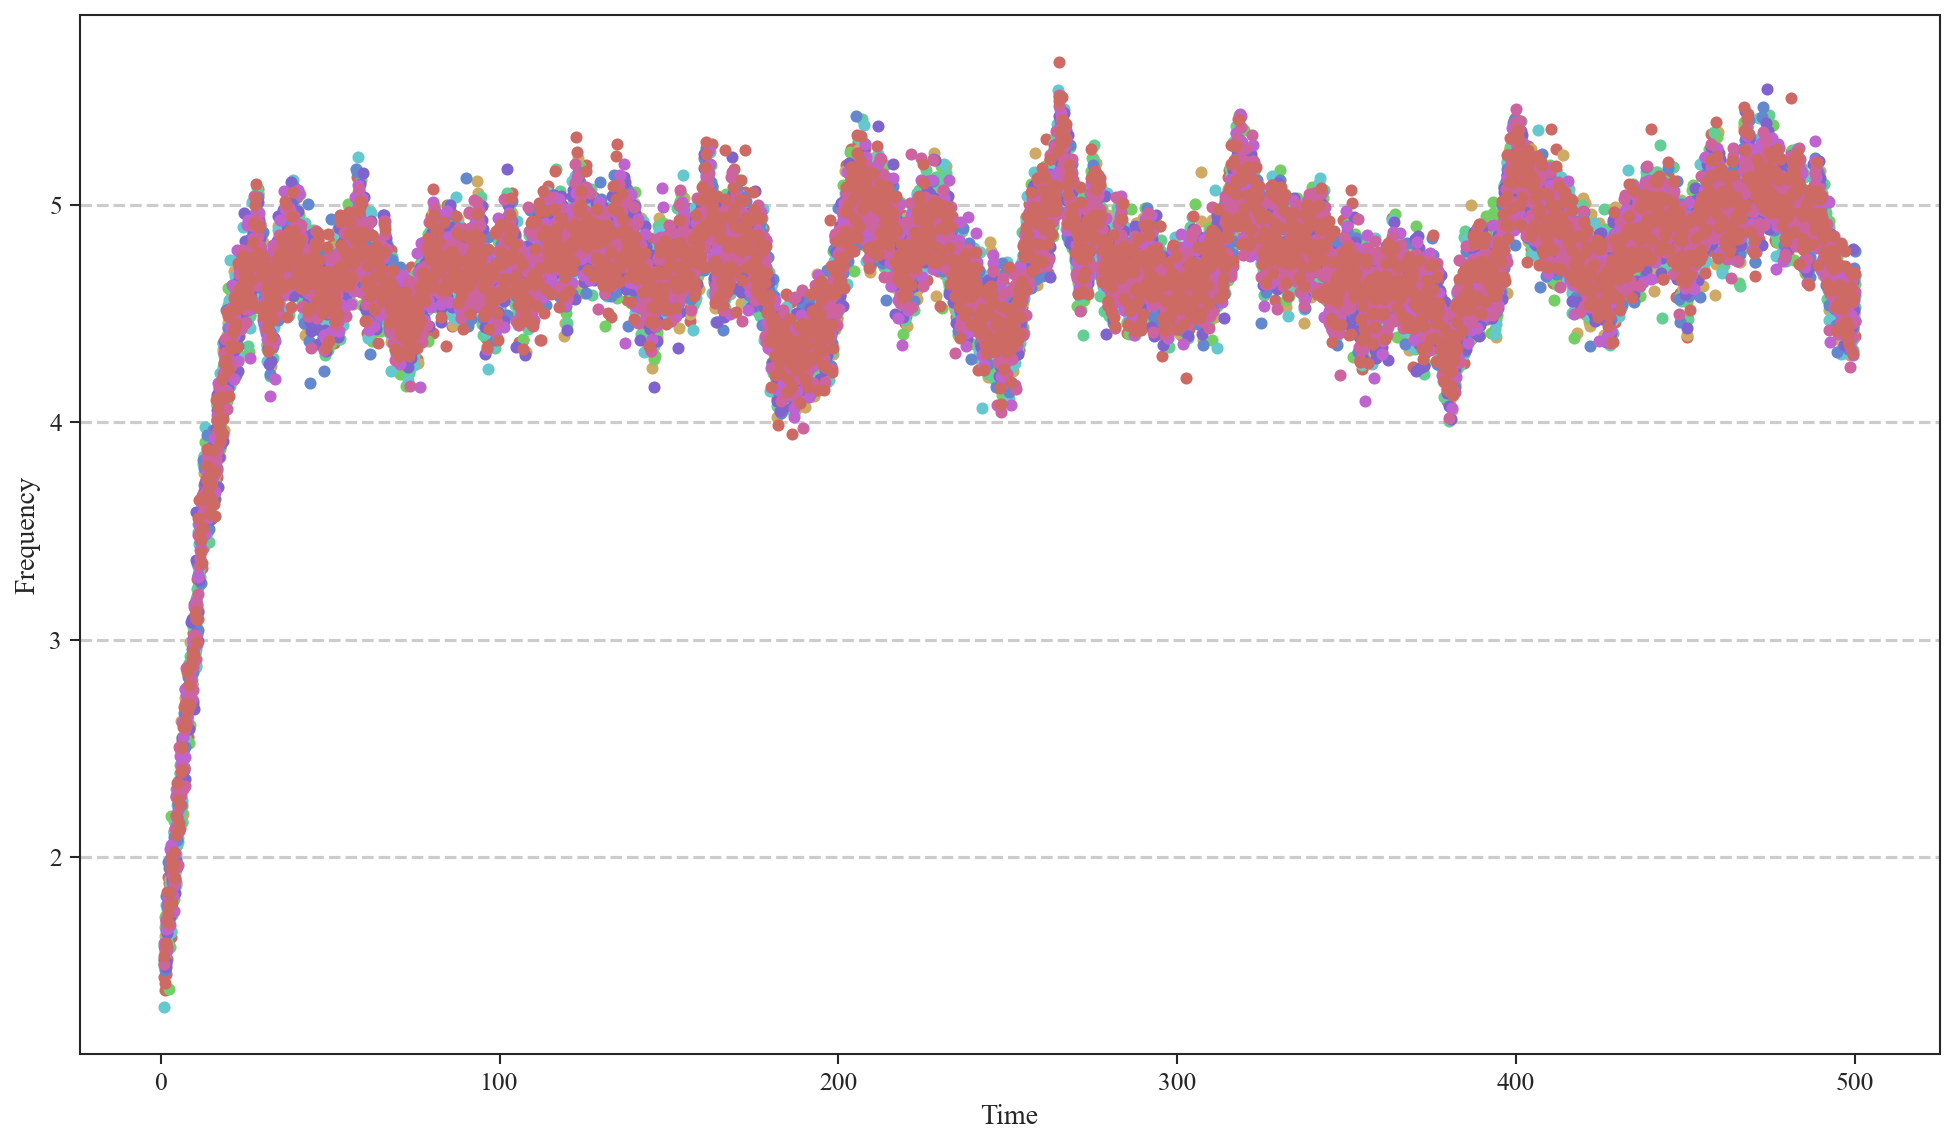

In [151]:


for i in range(len(w_save)):
    x = np.linspace(1, t_max, len(w_save[i]))
    plt.plot(x, w_save[i], 'o', label=fr'$\omega_{i}$')

#w_mean = np.mean(w_save, axis=0)
#w_std = np.std(w_save, axis=0)
#plt.errorbar(x, w_mean, yerr=w_std, fmt='o', markersize=8, capsize=8, color='k')


plt.xlabel('Time')
plt.ylabel('Frequency')
#plt.xlim(20,25)
#plt.ylim(6,12)
#plt.legend()

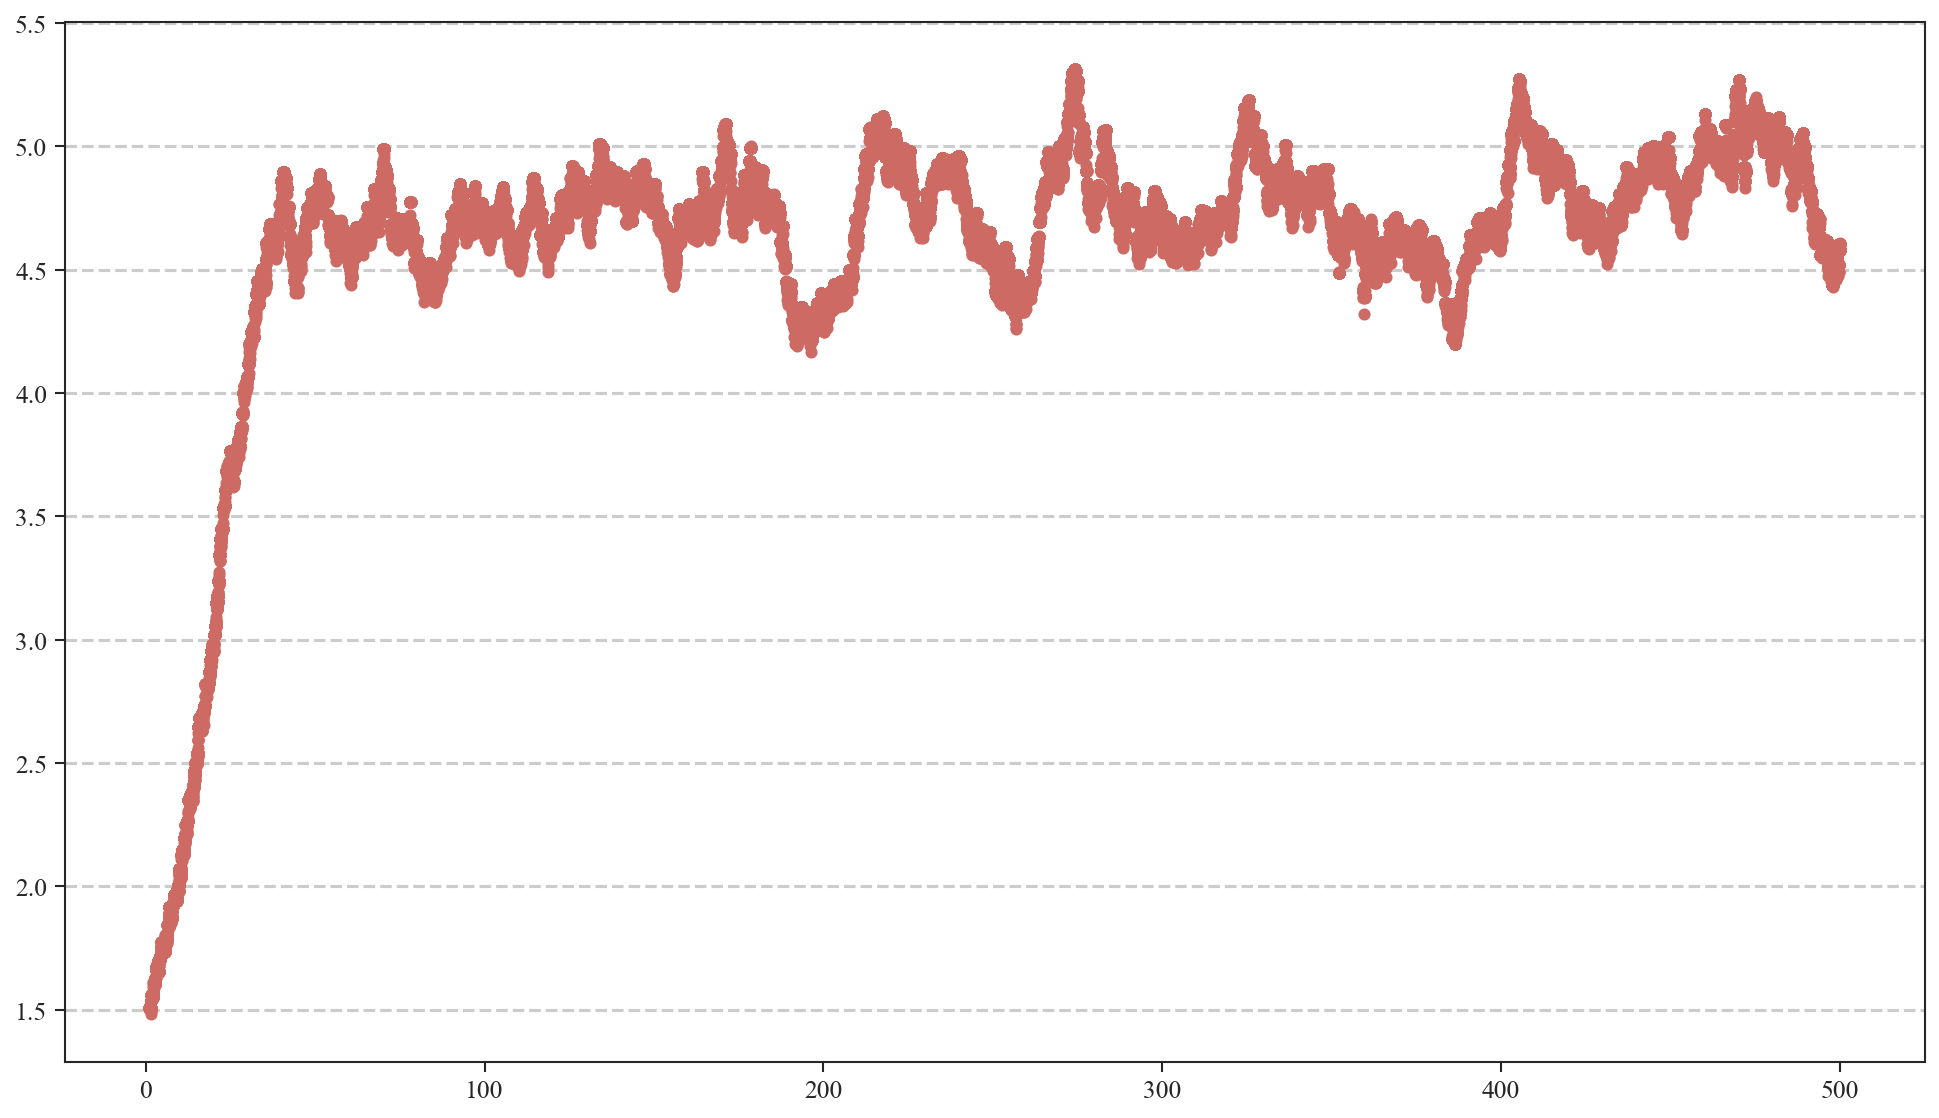

In [152]:
x1 = np.linspace(1,t_max, len(avg_save))
plt.plot(x1, avg_save, 'o', label='Average')